In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [17]:
figuredir = '../figures/acw_image/'

import os
    
CHECK_FOLDER = os.path.isdir(figuredir)

if not CHECK_FOLDER:
    os.makedirs(figuredir)
    print("Created folder : ", figuredir)
else:
    print(figuredir, "Folder already exists")

Created folder :  ../figures/acw_image/


In [2]:
imgHeight, imgWidth = 240, 496
batchSize = 20

trainDataSet = tf.keras.utils.image_dataset_from_directory(
    "../datasets/rubik-cube/train/",
    image_size = (imgHeight, imgWidth),
    batch_size = batchSize
)
validateDataSet = tf.keras.utils.image_dataset_from_directory(
    "../datasets/rubik-cube/validation/",
    image_size = (imgHeight, imgWidth),
    batch_size = batchSize
)
testDataSet = tf.keras.utils.image_dataset_from_directory(
    "../datasets/rubik-cube/test/",
    image_size = (imgHeight, imgWidth),
    batch_size = batchSize
)

Found 580 files belonging to 6 classes.
Found 24 files belonging to 6 classes.


2023-05-30 18:47:26.839846: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Found 36 files belonging to 6 classes.


2023-05-30 19:30:20.522847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [580]
	 [[{{node Placeholder/_0}}]]
2023-05-30 19:30:20.523272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [580]
	 [[{{node Placeholder/_0}}]]


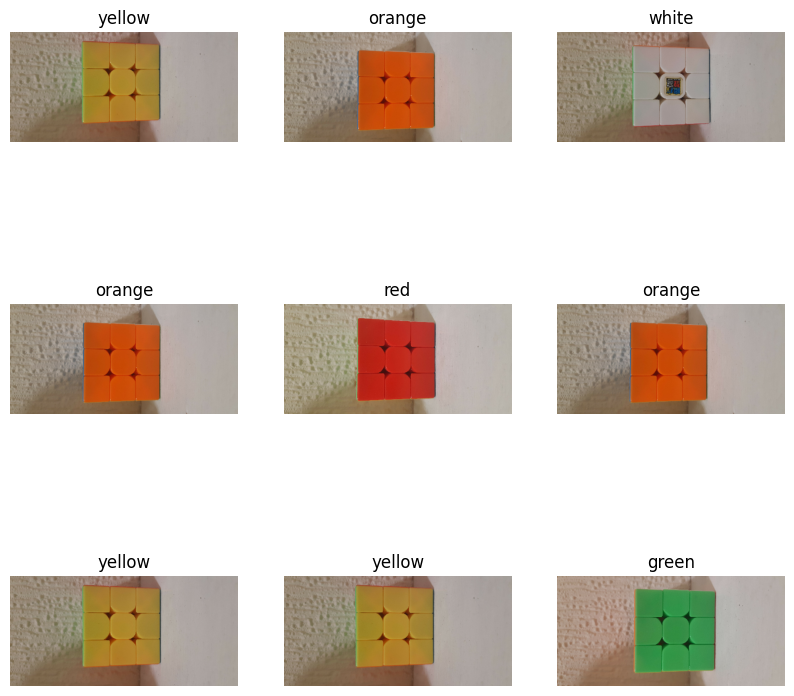

In [18]:
classNames = ["blue", "green", "orange", "red", "white", "yellow"]
plt.figure(figsize=(10, 10))
for images, labels in trainDataSet.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNames[labels[i]])
        plt.axis("off")

plt.savefig(figuredir + "random-dataset.png", bbox_inches='tight', dpi=1200)

In [4]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(6)
    ]
)

In [5]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [7]:
model.fit(
    trainDataSet,
    validation_data = validateDataSet,
    epochs = 10
)

Epoch 1/10
29/29 [==============================] - 83s 3s/step - loss: 2.2773e-07 - accuracy: 1.0000 - val_loss: 2.4339e-07 - val_accuracy: 1.0000
Epoch 2/10
29/29 [==============================] - 86s 2s/step - loss: 2.0964e-07 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 3/10
29/29 [==============================] - 64s 2s/step - loss: 1.9772e-07 - accuracy: 1.0000 - val_loss: 2.3345e-07 - val_accuracy: 1.0000
Epoch 4/10
29/29 [==============================] - 68s 2s/step - loss: 1.7964e-07 - accuracy: 1.0000 - val_loss: 2.1855e-07 - val_accuracy: 1.0000
Epoch 5/10
29/29 [==============================] - 75s 2s/step - loss: 1.7655e-07 - accuracy: 1.0000 - val_loss: 2.1358e-07 - val_accuracy: 1.0000
Epoch 6/10
29/29 [==============================] - 62s 2s/step - loss: 1.7717e-07 - accuracy: 1.0000 - val_loss: 2.0862e-07 - val_accuracy: 1.0000
Epoch 7/10
29/29 [==============================] - 59s 2s/step - loss: 1.7511e-07 - accuracy: 1.0000 - val_loss

In [8]:
model.evaluate(testDataSet)

2023-05-30 19:21:05.391114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [36]
	 [[{{node Placeholder/_0}}]]
2023-05-30 19:21:05.396084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [36]
	 [[{{node Placeholder/_4}}]]


2/2 [==============================] - 2s 343ms/step - loss: 1.8146e-06 - accuracy: 1.0000


[1.8146206457458902e-06, 1.0]

2023-05-30 19:30:31.931430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [36]
	 [[{{node Placeholder/_0}}]]
2023-05-30 19:30:31.934006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [36]
	 [[{{node Placeholder/_0}}]]


tf.Tensor(
[[-27.328588    -3.703289    27.060776    11.12281     -8.732074
    4.0850334 ]
 [-17.77033     -0.9503999    4.5610456  -11.3240185    3.5074778
   19.912138  ]
 [ 34.784657    13.059528   -13.087924    -8.290998    14.537885
  -17.106346  ]
 [  5.2407985   23.795979    -9.379265   -10.449383     8.519843
    1.4758228 ]
 [ 34.99783     12.889157   -12.998668    -8.42319     14.523107
  -17.131395  ]
 [-27.308323    -3.7045374   27.038223    11.131393    -8.727485
    4.080454  ]
 [-17.68017     -0.94403744   4.477253   -11.310211     3.4905653
   19.92294   ]
 [  2.7166984    1.1941481   -6.7918787  -12.837121    18.731056
    3.647347  ]
 [ 35.212322    12.793902   -12.954032    -8.483469    14.505584
  -17.207886  ]
 [-27.306318    -3.7086096   27.027756    11.207144    -8.724639
    4.049901  ]
 [-17.703726    -0.9447899    4.509879   -11.349906     3.517968
   19.927109  ]
 [-19.32907     -1.4902782   17.486727    28.924267    -7.298279
   -6.99852   ]
 [ 34.994415   

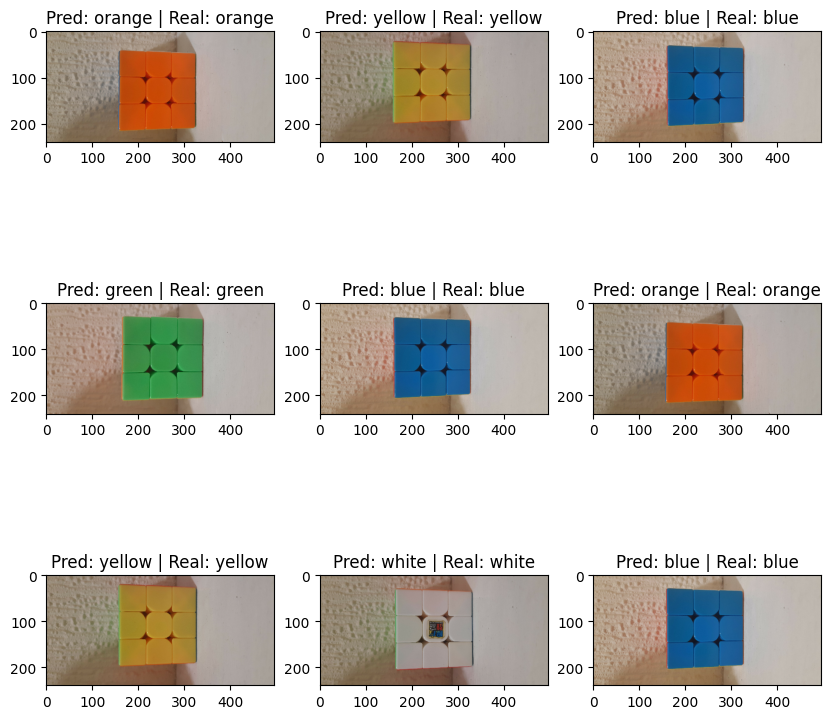

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in testDataSet.take(1):
    classifications = model(images)
    print(classifications)

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = numpy.argmax(classifications[i])
        plt.title("Pred: " + classNames[index] + " | Real: " + classNames[labels[i]])
        
plt.savefig(figuredir + "real-vs-predicted-outcome.png", bbox_inches='tight', dpi=1200)